# Laboratory Exercise 1: 
Parin Patel
IST 718 


**Goal**: Determine the best salary for the next Syracuse head football coach. This does not include bonuses, just total compensation. 

Steps: 
    1. Load coaches dataset 
    2. Review and clean dataset.
    3. load graduation rates dataset
    4.Develop vector for each school using last years record.
    5. Develop data frame of analysis
    6. Crate and Fit a regression model
        -with salary as the response and relevent predictor (need more than one predictor)
      
      ~Extra~
    7. Create a geographic visual that best depicts the conference median salary
    8. Fit a hiearchical model based on conference. 
    9. Use additional material from link to recreate the code for the basic regression model with a training and test 
       set. Do not use conference as a predictor. 

**Questions Answered:**
    1. What is the recommended salary for a Syracuse football coach?
    2. What would his salary be if Syracuse was still in the Big East? 
        -Compare this to if they were in the Big Ten? 
    3. What schools were dropeed from the data. 
        -Why? 
    4. What effect does graduation rates have on projected salary? 
    5. How good is the model?
    6. What is the single biggest impact on salary size?
    


Notes/Thoughts along the way: 
    1. To complete number 4 above - need coaches win and loss records. 
        -Solved this by creating own Coaches win and loss records dataset by importing data from website and creating master datatable. See below. 
   

In [546]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

import os
os.getcwd()

'/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1'

# 1 - 2 : Import and Scrub Data

In [382]:
#Resource used for lamba and fuzzy string matching: 
#https://www.datacamp.com/community/tutorials/fuzzy-string-python
#https://en.wikipedia.org/wiki/Levenshtein_distance
#https://github.com/wblakecannon/DataCamp/blob/master/10-cleaning-data-in-python/4-cleaning-data-for-analysis/07-lambda-functions.py
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        #return "The strings are {} edits away".format(distance[row][col])
        return distance[row][col]

In [317]:
IDIR = '.'
coaches = pd.read_csv('/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/Coaches.csv')
coaches.head(10)


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
5,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000"
6,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667"
7,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000"
8,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
9,Army,Ind.,Jeff Monken,932521,932521,--,--,$0,--


## Coaches Dataset:  Things to clean out
    - Remove rows with  -- 
    - Some columns have $ , others of not. This should be removed 
       altogether. 
    - some cells ('Ind.) have . 
    - remove rows that are blank. 
 

##### Note: 129 rows with 9 columns. 
    - will need to remove following rows:
        Bonus, BonusPaid, AssistantPay, Buyout, SchoolPay


In [318]:
coaches.info()
print(coaches.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
School          129 non-null object
Conference      129 non-null object
Coach           129 non-null object
SchoolPay       129 non-null object
TotalPay        129 non-null object
Bonus           129 non-null object
BonusPaid       129 non-null object
AssistantPay    129 non-null object
Buyout          129 non-null object
dtypes: object(9)
memory usage: 9.1+ KB
(129, 9)


In [319]:
coaches.columns

Index(['School', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout'],
      dtype='object')

In [320]:
#remove columns: Bonus, BonusPaid, AssistantPay, Buyout, SchoolPay
coaches = coaches.drop(["Bonus", "BonusPaid", "AssistantPay", "Buyout", "SchoolPay"], axis = 1)

#remove rows with -- 
for column in list(coaches):
    coaches[column].replace('--', np.nan, inplace=True)
coaches.dropna(inplace=True)

#For TotalPay - convert the $ to flood 
coaches['TotalPay'] = coaches['TotalPay'].apply(lambda x: x.replace('$', '')).apply(lambda x: x.replace(',','')).astype(float)
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 4 columns):
School        125 non-null object
Conference    125 non-null object
Coach         125 non-null object
TotalPay      125 non-null float64
dtypes: float64(1), object(3)
memory usage: 4.9+ KB


## Import Stadium Size data: 
 scrape data from Wikipedia. There is a table that lists all NCAA football stadiums and their capacity. 

link: https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums



In [321]:
url3 = 'http://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity'

stadiums = pd.read_html(url3,index_col=1, attrs={'class':'wikitable'}, header=0)[0]

print(stadiums.shape)
print("Data Source: {}".format(url3))
stadiums.head()

(149, 6)
Data Source: http://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity


,Image,Capacity,City,State/Province,Home teams,Refs
Stadium,,,,,,
Michigan Stadium,NaN,115109,Ann Arbor,Michigan,Michigan Wolverines,[1][circular reference]
Beaver Stadium,NaN,110889,University Park,Pennsylvania,Penn State Nittany Lions,[2]
Kyle Field,NaN,110633,College Station,Texas,Texas A&M Aggies,NaN
Ohio Stadium,NaN,110045,Columbus,Ohio,Ohio State Buckeyes,[3]
Neyland Stadium,NaN,109061,Knoxville,Tennessee,Tennessee Volunteers,[4]


In [322]:
## Stadium Cleaning and Prep: 
print(stadiums.info())

print(stadiums.head())

stadiums.reset_index(inplace=True)
print(stadiums.head())

#summary
print(stadiums.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Michigan Stadium to Joe Aillet Stadium
Data columns (total 6 columns):
Image             0 non-null float64
Capacity          149 non-null object
City              149 non-null object
State/Province    149 non-null object
Home teams        149 non-null object
Refs              32 non-null object
dtypes: float64(1), object(5)
memory usage: 8.1+ KB
None
                  Image Capacity             City State/Province  \
Stadium                                                            
Michigan Stadium    NaN   115109        Ann Arbor       Michigan   
Beaver Stadium      NaN   110889  University Park   Pennsylvania   
Kyle Field          NaN   110633  College Station          Texas   
Ohio Stadium        NaN   110045         Columbus           Ohio   
Neyland Stadium     NaN   109061        Knoxville      Tennessee   

                                Home teams                     Refs  
Stadium                                  

In [323]:
stadiums.head(10)

,Stadium,Image,Capacity,City,State/Province,Home teams,Refs
0,Michigan Stadium,NaN,115109,Ann Arbor,Michigan,Michigan Wolverines,[1][circular reference]
1,Beaver Stadium,NaN,110889,University Park,Pennsylvania,Penn State Nittany Lions,[2]
2,Kyle Field,NaN,110633,College Station,Texas,Texas A&M Aggies,NaN
3,Ohio Stadium,NaN,110045,Columbus,Ohio,Ohio State Buckeyes,[3]
4,Neyland Stadium,NaN,109061,Knoxville,Tennessee,Tennessee Volunteers,[4]
5,AT&T Stadium,NaN,108713,Arlington,Texas,"Dallas Cowboys, Cotton Bowl Classic game, Big ...",[5]
6,Rose Bowl,NaN,106869,Pasadena,California,"UCLA Bruins, the Rose Bowl Game, hosted the BC...",[6]
7,Darrell K Royal–Texas Memorial Stadium,NaN,103507,Austin,Texas,Texas Longhorns,[7]
8,Tiger Stadium,NaN,102321,Baton Rouge,Louisiana,LSU Tigers,[8]
9,Bryant–Denny Stadium,NaN,101821,Tuscaloosa,Alabama,Alabama Crimson Tide,[9]


In [324]:
colToKeep = ['Stadium','Capacity','City','State/Province','Home teams']

stadiumsdf = stadiums[colToKeep]

print(stadiumsdf.head())
print(stadiumsdf.shape)


#rename stadium columns to remove space and / 
renameStadcol = {'Stadium' : 'Stadium','Capacity': 'Capacity','City':'City','State/Province':'State','Home teams':'HomeTeams'}

stadiumsdf.rename(index=str, columns=renameStadcol, inplace=True)

print(stadiumsdf.head(10))

            Stadium Capacity             City State/Province  \
0  Michigan Stadium   115109        Ann Arbor       Michigan   
1    Beaver Stadium   110889  University Park   Pennsylvania   
2        Kyle Field   110633  College Station          Texas   
3      Ohio Stadium   110045         Columbus           Ohio   
4   Neyland Stadium   109061        Knoxville      Tennessee   

                 Home teams  
0       Michigan Wolverines  
1  Penn State Nittany Lions  
2          Texas A&M Aggies  
3       Ohio State Buckeyes  
4      Tennessee Volunteers  
(149, 5)
                                  Stadium Capacity             City  \
0                        Michigan Stadium   115109        Ann Arbor   
1                          Beaver Stadium   110889  University Park   
2                              Kyle Field   110633  College Station   
3                            Ohio Stadium   110045         Columbus   
4                         Neyland Stadium   109061        Knoxville   


In [325]:
stadiumsdf.head(10)

,Stadium,Capacity,City,State,HomeTeams
0,Michigan Stadium,115109,Ann Arbor,Michigan,Michigan Wolverines
1,Beaver Stadium,110889,University Park,Pennsylvania,Penn State Nittany Lions
2,Kyle Field,110633,College Station,Texas,Texas A&M Aggies
3,Ohio Stadium,110045,Columbus,Ohio,Ohio State Buckeyes
4,Neyland Stadium,109061,Knoxville,Tennessee,Tennessee Volunteers
5,AT&T Stadium,108713,Arlington,Texas,"Dallas Cowboys, Cotton Bowl Classic game, Big ..."
6,Rose Bowl,106869,Pasadena,California,"UCLA Bruins, the Rose Bowl Game, hosted the BC..."
7,Darrell K Royal–Texas Memorial Stadium,103507,Austin,Texas,Texas Longhorns
8,Tiger Stadium,102321,Baton Rouge,Louisiana,LSU Tigers
9,Bryant–Denny Stadium,101821,Tuscaloosa,Alabama,Alabama Crimson Tide


## Importing Graduation Rate Data 
Link: https://web3.ncaa.org/aprsearch/gsrsearch
 - Filtered by "Football"
 - Downloaded as a .csv file. 
 - Years 1998 to 2012. 

In [326]:
gsr  = pd.read_csv("/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/gsr.csv")
gsr.head()

,Year,School,Conference,Sport,State,GSR,FGR
0,1998,University of Akron,Mid-American Conference,Football,OH,60.0,53.0
1,1998,Alabama State University,Southwestern Athletic Conf.,Football,AL,44.0,41.0
2,1998,University of Alabama,Southeastern Conference,Football,AL,39.0,39.0
3,1998,University of Alabama at Birmingham,Conference USA,Football,AL,51.0,52.0
4,1998,Alcorn State University,Southwestern Athletic Conf.,Football,MS,88.0,45.0


In [327]:
#review GSR
print(gsr.shape)
##note that no cleanign needed to be performed. 

(3589, 7)


## Importing Coaches Win and Loss Records data: 
    -This .csv was created from here:
        https://www.sports-reference.com/cfb/coaches/a-index.html
    - since each coach was listed alphabetically and on difference pages, the csv was created from excel imports. 
        

In [328]:
coach_WLrecord  = pd.read_csv("/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/coachWinLosses.csv")

coach_WLrecord.head()


,Coach,From,To,Last School,Yrs,G,W,L,T,Pct,G(bowls),W(bowls),L(bowls),T(bowls),Pct(bowls)
0,Eli Abbott,1902,1902,Alabama,1,8,4,4,0,0.500,0,0.0,0,0.0,NaN
1,Earl Abell,1928,1930,Virginia,3,28,14,12,2,0.536,0,0.0,0,0.0,NaN
2,Earl Able,1923,1924,Mississippi State,2,18,10,6,2,0.611,0,0.0,0,0.0,NaN
3,George Adams,1890,1892,Harvard,3,36,34,2,0,0.944,0,0.0,0,0.0,NaN
4,Hobbs Adams,1940,1946,Kansas State,3,27,4,21,2,0.185,0,0.0,0,0.0,NaN


In [329]:
coach_WLrecord.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 15 columns):
Coach          2171 non-null object
From           2171 non-null int64
To             2171 non-null int64
Last School    2171 non-null object
Yrs            2171 non-null int64
G              2171 non-null int64
W              2171 non-null int64
L              2171 non-null int64
T              2171 non-null int64
Pct            2171 non-null float64
G(bowls)       2171 non-null int64
W(bowls)       2170 non-null float64
L(bowls)       2171 non-null int64
T(bowls)       2170 non-null float64
Pct(bowls)     682 non-null float64
dtypes: float64(4), int64(9), object(2)
memory usage: 254.5+ KB


## Data PreProcessing: 

    - Check: Stadium vs Coaches. Lets see if "Home Team" in stadium match "School" in Coaches. 



In [330]:
## Check: Stadium vs Coaches. Lets see if "Home Team" in stadium match "School" in Coaches. 
matches = {}
hometeam = stadiumsdf['HomeTeams'].values
print(len(hometeam))

schoolname = coaches['School'].values
print(len(schoolname))

for elm in hometeam:
    for el in schoolname:
        if levenshtein_ratio_and_distance(elm, el, ratio_calc=True) > 0.7:
            matches[elm] = el

            
print(matches)

149
125
{'Texas A&M Aggies': 'Texas A&M', 'Florida Gators': 'Florida State', 'Oklahoma Sooners': 'Oklahoma State', 'South Carolina Gamecocks': 'South Carolina', 'Florida State Seminoles': 'Florida State', 'Michigan State Spartans': 'Michigan State', 'Washington Huskies': 'Washington State', 'Virginia Tech Hokies': 'Virginia Tech', 'North Carolina Tar Heels': 'North Carolina State', 'Mississippi State Bulldogs': 'Mississippi State', 'Oklahoma State Cowboys': 'Oklahoma State', 'Kansas State Wildcats': 'Kansas State', 'East Carolina Pirates': 'East Carolina', 'Northwestern Wildcats': 'Northwestern', 'Oregon State Beavers': 'Oregon State', 'Utah Utes': 'Utah State', 'Boston College Eagles': 'Boston College', 'Colorado State Rams.': 'Colorado State', 'Fresno State Bulldogs': 'Fresno State', "Louisiana-Lafayette Ragin' Cajuns": 'Louisiana-Lafayette', 'Washington State Cougars': 'Washington State', 'Middle Tennessee Blue Raiders': 'Middle Tennessee', 'Northern Illinois Huskies': 'Northern Ill

In [331]:
## Check: Coaches win and loss record. 
print(coach_WLrecord.columns)


coach_WLrecord.info()

Index(['Coach', 'From', 'To', 'Last School', 'Yrs', 'G', 'W', 'L', 'T', 'Pct',
       'G(bowls)', 'W(bowls)', 'L(bowls)', 'T(bowls)', 'Pct(bowls)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 15 columns):
Coach          2171 non-null object
From           2171 non-null int64
To             2171 non-null int64
Last School    2171 non-null object
Yrs            2171 non-null int64
G              2171 non-null int64
W              2171 non-null int64
L              2171 non-null int64
T              2171 non-null int64
Pct            2171 non-null float64
G(bowls)       2171 non-null int64
W(bowls)       2170 non-null float64
L(bowls)       2171 non-null int64
T(bowls)       2170 non-null float64
Pct(bowls)     682 non-null float64
dtypes: float64(4), int64(9), object(2)
memory usage: 254.5+ KB


In [332]:
col2sel = ['Coach','Yrs','G', 'W', 'L', 'T','Pct','Last School']

coach_WLrecord = coach_WLrecord[col2sel]

coach_WLrecord.head()

,Coach,Yrs,G,W,L,T,Pct,Last School
0,Eli Abbott,1,8,4,4,0,0.500,Alabama
1,Earl Abell,3,28,14,12,2,0.536,Virginia
2,Earl Able,2,18,10,6,2,0.611,Mississippi State
3,George Adams,3,36,34,2,0,0.944,Harvard
4,Hobbs Adams,3,27,4,21,2,0.185,Kansas State


In [333]:
## reset index and remove the special character in name

coach_WLrecord.reset_index(inplace=True)
print(coach_WLrecord.head())


coach_WLrecord['Coach'] = coach_WLrecord['Coach'].str.replace('\+', '')
print('='*50)

print(coach_WLrecord.head())

   index         Coach  Yrs   G   W   L  T    Pct        Last School
0      0    Eli Abbott    1   8   4   4  0  0.500            Alabama
1      1    Earl Abell    3  28  14  12  2  0.536           Virginia
2      2     Earl Able    2  18  10   6  2  0.611  Mississippi State
3      3  George Adams    3  36  34   2  0  0.944            Harvard
4      4   Hobbs Adams    3  27   4  21  2  0.185       Kansas State
   index         Coach  Yrs   G   W   L  T    Pct        Last School
0      0    Eli Abbott    1   8   4   4  0  0.500            Alabama
1      1    Earl Abell    3  28  14  12  2  0.536           Virginia
2      2     Earl Able    2  18  10   6  2  0.611  Mississippi State
3      3  George Adams    3  36  34   2  0  0.944            Harvard
4      4   Hobbs Adams    3  27   4  21  2  0.185       Kansas State


### Merge Dataframes

In [334]:
coaches.head()

,School,Conference,Coach,TotalPay
0,Air Force,Mt. West,Troy Calhoun,885000.0
1,Akron,MAC,Terry Bowden,412500.0
2,Alabama,SEC,Nick Saban,8307000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0


In [335]:
stadiumdf.head()

,Stadium,Capacity,City,State,HomeTeams,School
0,Michigan Stadium,115109,Ann Arbor,Michigan,Michigan Wolverines,Michigan
1,Beaver Stadium,110889,University Park,Pennsylvania,Penn State Nittany Lions,Penn State
2,Kyle Field,110633,College Station,Texas,Texas A&M Aggies,Texas A&M
3,Ohio Stadium,110045,Columbus,Ohio,Ohio State Buckeyes,Ohio State
4,Neyland Stadium,109061,Knoxville,Tennessee,Tennessee Volunteers,Tennessee


In [336]:
coach_WLrecord.head()

,index,Coach,Yrs,G,W,L,T,Pct,Last School
0,0,Eli Abbott,1,8,4,4,0,0.500,Alabama
1,1,Earl Abell,3,28,14,12,2,0.536,Virginia
2,2,Earl Able,2,18,10,6,2,0.611,Mississippi State
3,3,George Adams,3,36,34,2,0,0.944,Harvard
4,4,Hobbs Adams,3,27,4,21,2,0.185,Kansas State


In [337]:
gsr.head()

,Year,School,Conference,Sport,State,GSR,FGR
0,1998,University of Akron,Mid-American Conference,Football,OH,60.0,53.0
1,1998,Alabama State University,Southwestern Athletic Conf.,Football,AL,44.0,41.0
2,1998,University of Alabama,Southeastern Conference,Football,AL,39.0,39.0
3,1998,University of Alabama at Birmingham,Conference USA,Football,AL,51.0,52.0
4,1998,Alcorn State University,Southwestern Athletic Conf.,Football,MS,88.0,45.0


In [338]:
##coach and wl record

coachMergeRecord = coaches.merge(coach_WLrecord, left_on ='Coach', right_on='Coach' ,how='left')

coachMergeRecord.head()

,School,Conference,Coach,TotalPay,index,Yrs,G,W,L,T,Pct,Last School
0,Air Force,Mt. West,Troy Calhoun,885000.0,258.0,13.0,167.0,98.0,69.0,0.0,0.587,Air Force
1,Akron,MAC,Terry Bowden,412500.0,180.0,13.0,152.0,82.0,69.0,1.0,0.543,Akron
2,Alabama,SEC,Nick Saban,8307000.0,1702.0,24.0,314.0,248.0,65.0,1.0,0.791,Alabama
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,337.0,4.0,53.0,34.0,19.0,0.0,0.642,Alabama-Birmingham
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,1717.0,6.0,76.0,55.0,21.0,0.0,0.724,Louisville


In [339]:
coachMergeRecord.shape

(125, 12)

In [340]:
for elm in coaches['School'].values:
    for el in stadiumdf['HomeTeams'].values:
        if elm in el:
            print(elm,'====================', el)           

Air Force ==================== Air Force Falcons
Akron ==================== Akron Zips
Alabama ==================== Alabama Crimson Tide
Alabama ==================== UAB Blazers (Main tenant), the Magic City Classic game, and the BBVA Compass Bowl game; former part-time home for Alabama (full-time for 1987) and Auburn
Alabama ==================== South Alabama Jaguars, the GoDaddy.com Bowl game, and the Senior Bowl game
Arizona ==================== Arizona State Sun Devils and the Cactus Bowl game
Arizona ==================== Arizona Cardinals, the Fiesta Bowl game, hosted the BCS National Championship game every fourth year, and will host a College Football semifinal game once every three years
Arizona ==================== Arizona Wildcats
Arizona State ==================== Arizona State Sun Devils and the Cactus Bowl game
Arkansas ==================== Arkansas Razorbacks
Arkansas ==================== No permanent home team, used for one Arkansas Razorbacks game each season
Arkansas =

In [341]:
##convert and object column in a dataframe to numeric. 
    ##and remove the special character $ from the value'''
    
def obj2num_col2(df, col):
    
    #df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('--','')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(' ', '')
    df[col] = df[col].str.replace('\[..\]', '')
    df[col] = df[col].str.replace('\(.+\)', '')
    df[col] = df[col].convert_objects(convert_numeric=True) 
    return df
  
mydict = {}
for elm in coaches['School'].values:
    for el in stadiumdf['HomeTeams'].values:
        if elm in el:
            mydict[el] = elm            
            
            
stadiumdf['School'] = stadiumdf['HomeTeams']

print(stadiumdf.head())


stadiumdf.replace({'School':mydict}, inplace=True)

print(stadiumdf.head())


temp = stadiumdf.copy()

temp = obj2num_col2(temp, 'Capacity')

print(temp.tail(25))

            Stadium Capacity             City         State  \
0  Michigan Stadium   115109        Ann Arbor      Michigan   
1    Beaver Stadium   110889  University Park  Pennsylvania   
2        Kyle Field   110633  College Station         Texas   
3      Ohio Stadium   110045         Columbus          Ohio   
4   Neyland Stadium   109061        Knoxville     Tennessee   

                  HomeTeams                    School  
0       Michigan Wolverines       Michigan Wolverines  
1  Penn State Nittany Lions  Penn State Nittany Lions  
2          Texas A&M Aggies          Texas A&M Aggies  
3       Ohio State Buckeyes       Ohio State Buckeyes  
4      Tennessee Volunteers      Tennessee Volunteers  
            Stadium Capacity             City         State  \
0  Michigan Stadium   115109        Ann Arbor      Michigan   
1    Beaver Stadium   110889  University Park  Pennsylvania   
2        Kyle Field   110633  College Station         Texas   
3      Ohio Stadium   110045     

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


In [342]:
coach_merge2 = coachMergeRecord.merge(temp, left_on ='School', right_on='School')


coach_merge2.head()

,School,Conference,Coach,TotalPay,index,Yrs,G,W,L,T,Pct,Last School,Stadium,Capacity,City,State,HomeTeams
0,Air Force,Mt. West,Troy Calhoun,885000.0,258.0,13.0,167.0,98.0,69.0,0.0,0.587,Air Force,Falcon Stadium,52480,Colorado Springs,Colorado,Air Force Falcons
1,Akron,MAC,Terry Bowden,412500.0,180.0,13.0,152.0,82.0,69.0,1.0,0.543,Akron,InfoCision Stadium–Summa Field,30000,Akron,Ohio,Akron Zips
2,Alabama,SEC,Nick Saban,8307000.0,1702.0,24.0,314.0,248.0,65.0,1.0,0.791,Alabama,Bryant–Denny Stadium,101821,Tuscaloosa,Alabama,Alabama Crimson Tide
3,Arizona,Pac-12,Kevin Sumlin,2000000.0,1892.0,12.0,153.0,95.0,58.0,0.0,0.621,Arizona,State Farm Stadium,63400,Glendale,Arizona,"Arizona Cardinals, the Fiesta Bowl game, hoste..."
4,Arizona,Pac-12,Kevin Sumlin,2000000.0,1892.0,12.0,153.0,95.0,58.0,0.0,0.621,Arizona,Arizona Stadium,55675,Tucson,Arizona,Arizona Wildcats


In [343]:
coach_merge2.shape

(110, 17)

In [344]:
coach_merge2.to_csv('/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/coach_merge2.csv')
print('.csv has been saved')

.csv has been saved


In [345]:
gsrCoachMerge = {}

for sch in coach_merge2['School'].values:
    for schg in gsr['School'].values:
        if sch in schg:
            gsrCoachMerge[sch] = schg
            
gsrCoachMerge

{'Air Force': 'U.S. Air Force Academy',
 'Akron': 'University of Akron',
 'Alabama': 'University of South Alabama',
 'Arizona': 'Northern Arizona University',
 'Arizona State': 'Arizona State University',
 'Arkansas': 'University of Arkansas, Pine Bluff',
 'Arkansas State': 'Arkansas State University',
 'Auburn': 'Auburn University',
 'Boise State': 'Boise State University',
 'Boston College': 'Boston College',
 'Buffalo': 'University at Buffalo, the State University of New York',
 'California': 'University of Southern California',
 'Cincinnati': 'University of Cincinnati',
 'Clemson': 'Clemson University',
 'Colorado': 'University of Northern Colorado',
 'Colorado State': 'Colorado State University',
 'Duke': 'Duke University',
 'East Carolina': 'East Carolina University',
 'Florida': 'University of South Florida',
 'Florida Atlantic': 'Florida Atlantic University',
 'Florida State': 'Florida State University',
 'Georgia': 'University of Georgia',
 'Houston': 'Sam Houston State Univer

In [346]:
## remove rows where salary <= 0 
## remove any rows where coaches is duplicate 


def clean_data(raw_df):
    clean_df = raw_df.drop_duplicates(subset='Coach')
    clean_df = clean_df[clean_df.TotalPay>0]
    return clean_df
  
  
coach_merge2 = clean_data(coach_merge2)
coach_merge2.shape

(91, 17)

In [347]:
temp = gsr.copy()

temp.columns

Index(['Year', 'School', 'Conference', 'Sport', 'State', 'GSR', 'FGR'], dtype='object')

In [348]:
gsrCoachMerge = {}

for sch in coach_merge2['School'].values:
    for schg in gsr['School'].values:
        if sch in schg:
            gsrCoachMerge[schg] = sch
            
gsrCoachMerge

{'U.S. Air Force Academy': 'Air Force',
 'University of Akron': 'Akron',
 'Alabama State University': 'Alabama',
 'University of Alabama': 'Alabama',
 'University of Alabama at Birmingham': 'Alabama',
 'Alabama A&M University': 'Alabama',
 'University of South Alabama': 'South Alabama',
 'University of North Alabama': 'Alabama',
 'Arizona State University': 'Arizona State',
 'University of Arizona': 'Arizona',
 'Northern Arizona University': 'Arizona',
 'Arkansas State University': 'Arkansas State',
 'University of Arkansas, Fayetteville': 'Arkansas',
 'University of Arkansas, Pine Bluff': 'Arkansas',
 'University of Central Arkansas': 'Arkansas',
 'Auburn University': 'Auburn',
 'Boise State University': 'Boise State',
 'Boston College': 'Boston College',
 'University at Buffalo, the State University of New York': 'Buffalo',
 'California Polytechnic State University': 'California',
 'California State University, Fresno': 'California',
 'California State University, Sacramento': 'Calif

In [349]:
temp['SchoolG'] = temp['School'] #temp values

print(temp.head())


#temp.head()
temp['SchoolG'] = temp['SchoolG'].map(gsrCoachMerge).fillna(temp['SchoolG'])

(temp.tail(20))


   Year                               School                   Conference  \
0  1998                  University of Akron      Mid-American Conference   
1  1998             Alabama State University  Southwestern Athletic Conf.   
2  1998                University of Alabama      Southeastern Conference   
3  1998  University of Alabama at Birmingham               Conference USA   
4  1998              Alcorn State University  Southwestern Athletic Conf.   

      Sport State   GSR   FGR                              SchoolG  
0  Football    OH  60.0  53.0                  University of Akron  
1  Football    AL  44.0  41.0             Alabama State University  
2  Football    AL  39.0  39.0                University of Alabama  
3  Football    AL  51.0  52.0  University of Alabama at Birmingham  
4  Football    MS  88.0  45.0              Alcorn State University  


,Year,School,Conference,Sport,State,GSR,FGR,SchoolG
3569,2012,Weber State University,Big Sky Conference,Football,UT,70.0,52.0,Weber State University
3570,2012,West Virginia University,Big 12 Conference,Football,WV,66.0,58.0,West Virginia
3571,2012,Western Carolina University,Southern Conference,Football,NC,81.0,61.0,Western Carolina University
3572,2012,Western Illinois University,Missouri Valley Football Conference,Football,IL,78.0,52.0,Illinois
3573,2012,Western Kentucky University,Conference USA,Football,KY,71.0,52.0,Kentucky
3574,2012,Western Michigan University,Mid-American Conference,Football,MI,80.0,47.0,Western Michigan
3575,2012,William & Mary,Colonial Athletic Association,Football,VA,87.0,82.0,William & Mary
3576,2012,University of Wisconsin-Madison,Big Ten Conference,Football,WI,90.0,77.0,Wisconsin
3577,2012,University of Wyoming,Mountain West Conference,Football,WY,85.0,51.0,Wyoming
3578,2012,Yale University,The Ivy League,Football,CT,100.0,NaN,Yale University


In [350]:
def clean_data(raw_df):
    '''remove rows that contain salary <= 0 or duplicate Coaches'''
    clean_df = raw_df.drop_duplicates(subset='SchoolG')
    #clean_df = clean_df[clean_df.TotalPay>0]
    return clean_df
  
  
  
temp  = clean_data(temp)
temp.shape

(204, 8)

In [351]:
coach_merge3 = coach_merge2.merge(temp, left_on='School', right_on='SchoolG')
coach_merge3.shape

(81, 25)

In [352]:
coach_merge3.head()

,School_x,Conference_x,Coach,TotalPay,index,Yrs,G,W,L,T,...,State_x,HomeTeams,Year,School_y,Conference_y,Sport,State_y,GSR,FGR,SchoolG
0,Air Force,Mt. West,Troy Calhoun,885000.0,258.0,13.0,167.0,98.0,69.0,0.0,...,Colorado,Air Force Falcons,1998,U.S. Air Force Academy,Mountain West Conference,Football,CO,91.0,NaN,Air Force
1,Akron,MAC,Terry Bowden,412500.0,180.0,13.0,152.0,82.0,69.0,1.0,...,Ohio,Akron Zips,1998,University of Akron,Mid-American Conference,Football,OH,60.0,53.0,Akron
2,Alabama,SEC,Nick Saban,8307000.0,1702.0,24.0,314.0,248.0,65.0,1.0,...,Alabama,Alabama Crimson Tide,1998,Alabama State University,Southwestern Athletic Conf.,Football,AL,44.0,41.0,Alabama
3,Arizona,Pac-12,Kevin Sumlin,2000000.0,1892.0,12.0,153.0,95.0,58.0,0.0,...,Arizona,"Arizona Cardinals, the Fiesta Bowl game, hoste...",1998,University of Arizona,Pac-12 Conference,Football,AZ,44.0,41.0,Arizona
4,Arizona State,Pac-12,Herm Edwards,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Arizona,Arizona State Sun Devils and the Cactus Bowl game,1998,Arizona State University,Pac-12 Conference,Football,AZ,52.0,49.0,Arizona State


In [353]:
#coach_merge3.to_csv('/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/coach_merge3.csv')
#print('.csv has been saved')

.csv has been saved


### Quality Checks: Merged Dataset

In [361]:
finalMerged = pd.read_csv('/Users/parinpatel/Documents/IST718(Advanced Analytics) /Lab1/coach_merge3.csv')
finalMerged.head()

,Rank,School_x,Conference_x,Coach,TotalPay,index,Yrs,G,W,L,...,State_x,HomeTeams,Year,School_y,Conference_y,Sport,State_y,GSR,FGR,SchoolG
0,1,Oklahoma,Big 12,Lincoln Riley,4800000,1640.0,3.0,42.0,36.0,6.0,...,Oklahoma,Oklahoma Sooners,1998,University of Oklahoma,Big 12 Conference,Football,OK,51,38.0,Oklahoma
1,2,Ohio State,Big Ten,Urban Meyer,7600000,1332.0,17.0,219.0,187.0,32.0,...,Ohio,Ohio State Buckeyes,1998,The Ohio State University,Big Ten Conference,Football,OH,54,49.0,Ohio State
2,3,Clemson,ACC,Dabo Swinney,6543350,1905.0,12.0,161.0,130.0,31.0,...,South Carolina,Clemson Tigers,1998,Clemson University,Atlantic Coast Conference,Football,SC,72,49.0,Clemson
3,4,Washington,Pac-12,Chris Petersen,4377500,1541.0,14.0,185.0,147.0,38.0,...,Maryland,Washington Redskins,1998,Eastern Washington University,Big Sky Conference,Football,WA,76,42.0,Washington
4,5,Alabama,SEC,Nick Saban,8307000,1702.0,24.0,314.0,248.0,65.0,...,Alabama,Alabama Crimson Tide,1998,Alabama State University,Southwestern Athletic Conf.,Football,AL,44,41.0,Alabama


<Figure size 432x288 with 0 Axes>

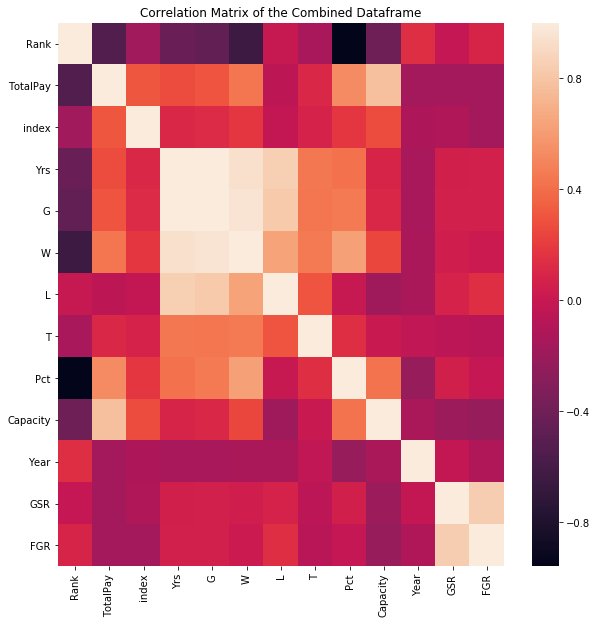

<Figure size 432x288 with 0 Axes>

In [362]:
corr = finalMerged.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Correlation Matrix of the Combined Dataframe')

plt.figure()

In [363]:
for col in finalMerged.columns: 
    print(col)

Rank
School_x
Conference_x
Coach
TotalPay
index
Yrs
G
W
L
T
Pct
Last School
Stadium
Capacity
City
State_x
HomeTeams
Year
School_y
Conference_y
Sport
State_y
GSR
FGR
SchoolG


In [364]:
print(len(finalMerged['Pct']))

81


In [365]:
print(finalMerged['Pct'].mean())

0.5505189873417721


In [366]:
#Create a top 25
finalMerged['Top25'] = finalMerged['Rank']
#cleandf.head()


finalMerged['Top25'].values[finalMerged['Top25'].values < 25] = 1

finalMerged['Top25'].values[finalMerged['Top25'].values >= 25] = 0


finalMerged.head()

,Rank,School_x,Conference_x,Coach,TotalPay,index,Yrs,G,W,L,...,HomeTeams,Year,School_y,Conference_y,Sport,State_y,GSR,FGR,SchoolG,Top25
0,1,Oklahoma,Big 12,Lincoln Riley,4800000,1640.0,3.0,42.0,36.0,6.0,...,Oklahoma Sooners,1998,University of Oklahoma,Big 12 Conference,Football,OK,51,38.0,Oklahoma,1
1,2,Ohio State,Big Ten,Urban Meyer,7600000,1332.0,17.0,219.0,187.0,32.0,...,Ohio State Buckeyes,1998,The Ohio State University,Big Ten Conference,Football,OH,54,49.0,Ohio State,1
2,3,Clemson,ACC,Dabo Swinney,6543350,1905.0,12.0,161.0,130.0,31.0,...,Clemson Tigers,1998,Clemson University,Atlantic Coast Conference,Football,SC,72,49.0,Clemson,1
3,4,Washington,Pac-12,Chris Petersen,4377500,1541.0,14.0,185.0,147.0,38.0,...,Washington Redskins,1998,Eastern Washington University,Big Sky Conference,Football,WA,76,42.0,Washington,1
4,5,Alabama,SEC,Nick Saban,8307000,1702.0,24.0,314.0,248.0,65.0,...,Alabama Crimson Tide,1998,Alabama State University,Southwestern Athletic Conf.,Football,AL,44,41.0,Alabama,1


In [521]:
# descriptive statistics
finalMerged.describe(include=['O'])

,School_x,Conference_x,Coach,Last School,Stadium,City,State_x,HomeTeams,School_y,Conference_y,Sport,State_y,SchoolG
count,81,81,81,79,81,81,81,81,81,81,81,81,81
unique,81,11,81,78,80,80,38,81,81,20,1,38,81
top,Oregon,Big Ten,Bronco Mendenhall,Houston,Memorial Stadium,Columbia,Texas,Tulsa Golden Hurricane,Eastern Washington University,Big 12 Conference,Football,TX,Oregon
freq,1,13,1,2,2,2,5,1,1,10,81,5,1


In [520]:
finalMerged.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,81.0,4.100000e+01,2.352658e+01,1.000,2.100000e+01,41.000,6.100000e+01,81.000
TotalPay,81.0,2.942228e+06,1.955288e+06,412500.000,1.500000e+06,2540928.000,3.980434e+06,8307000.000
index,79.0,9.919747e+02,6.226032e+02,5.000,4.380000e+02,1059.000,1.444500e+03,2121.000
Yrs,79.0,8.873418e+00,5.547850e+00,2.000,4.000000e+00,8.000,1.250000e+01,27.000
G,79.0,1.113165e+02,7.053051e+01,24.000,5.500000e+01,96.000,1.560000e+02,333.000
W,79.0,6.617722e+01,5.104818e+01,5.000,2.800000e+01,53.000,9.250000e+01,248.000
L,79.0,4.510127e+01,2.593018e+01,6.000,2.900000e+01,37.000,6.050000e+01,117.000
T,79.0,3.797468e-02,1.923564e-01,0.000,0.000000e+00,0.000,0.000000e+00,1.000
Pct,79.0,5.505190e-01,1.564989e-01,0.125,4.745000e-01,0.567,6.435000e-01,0.857
Capacity,81.0,5.964804e+04,2.295960e+04,28562.000,4.000000e+04,60454.000,7.500500e+04,115109.000


In [369]:
#check NA
coach_merge3.isnull().any()

School_x        False
Conference_x    False
Coach           False
TotalPay        False
index            True
Yrs              True
G                True
W                True
L                True
T                True
Pct              True
Last School      True
Stadium         False
Capacity        False
City            False
State_x         False
HomeTeams       False
Year            False
School_y        False
Conference_y    False
Sport           False
State_y         False
GSR             False
FGR              True
SchoolG         False
dtype: bool

In [370]:
finalMerged.isnull().sum()

Rank            0
School_x        0
Conference_x    0
Coach           0
TotalPay        0
index           2
Yrs             2
G               2
W               2
L               2
T               2
Pct             2
Last School     2
Stadium         0
Capacity        0
City            0
State_x         0
HomeTeams       0
Year            0
School_y        0
Conference_y    0
Sport           0
State_y         0
GSR             0
FGR             1
SchoolG         0
Top25           0
dtype: int64

In [371]:
finalMerged.columns

Index(['Rank', 'School_x', 'Conference_x', 'Coach', 'TotalPay', 'index', 'Yrs',
       'G', 'W', 'L', 'T', 'Pct', 'Last School', 'Stadium', 'Capacity', 'City',
       'State_x', 'HomeTeams', 'Year', 'School_y', 'Conference_y', 'Sport',
       'State_y', 'GSR', 'FGR', 'SchoolG', 'Top25'],
      dtype='object')

In [373]:
#select columns of interest

coltoKeep = ['Rank', 'School_x', 'Conference_x', 'Coach', 'TotalPay', 'Capacity','GSR', 'Top25','Pct','Stadium','Yrs']

finalMerged2 = finalMerged[coltoKeep]
finalMerged2.head()

,Rank,School_x,Conference_x,Coach,TotalPay,Capacity,GSR,Top25,Pct,Stadium,Yrs
0,1,Oklahoma,Big 12,Lincoln Riley,4800000,88308,51,1,0.857,Gaylord Family Oklahoma Memorial Stadium,3.0
1,2,Ohio State,Big Ten,Urban Meyer,7600000,110045,54,1,0.854,Ohio Stadium,17.0
2,3,Clemson,ACC,Dabo Swinney,6543350,86092,72,1,0.807,Frank Howard Field at Clemson Memorial Stadium,12.0
3,4,Washington,Pac-12,Chris Petersen,4377500,91704,76,1,0.795,FedExField,14.0
4,5,Alabama,SEC,Nick Saban,8307000,101821,44,1,0.791,Bryant–Denny Stadium,24.0


In [376]:
renamecol = {'Rank':'Rank', 'School_x':'School', 'Conference_x':'Conference', 'Coach':'Coach', 'TotalPay':'TotalPay', 
             'Capacity':'Capacity','GSR':'GSR', 'Top25':'Top25','Pct':'Pct','Stadium':'Stadium','Yrs':'Yrs'}


finalMerged2.rename(index=str, columns=renamecol, inplace=True)
print('='*50)
finalMerged2.head()

,Rank,School,Conference,Coach,TotalPay,Capacity,GSR,Top25,Pct,Stadium,Yrs
0,1,Oklahoma,Big 12,Lincoln Riley,4800000,88308,51,1,0.857,Gaylord Family Oklahoma Memorial Stadium,3.0
1,2,Ohio State,Big Ten,Urban Meyer,7600000,110045,54,1,0.854,Ohio Stadium,17.0
2,3,Clemson,ACC,Dabo Swinney,6543350,86092,72,1,0.807,Frank Howard Field at Clemson Memorial Stadium,12.0
3,4,Washington,Pac-12,Chris Petersen,4377500,91704,76,1,0.795,FedExField,14.0
4,5,Alabama,SEC,Nick Saban,8307000,101821,44,1,0.791,Bryant–Denny Stadium,24.0


In [377]:
finalMerged2.isnull().sum()


Rank          0
School        0
Conference    0
Coach         0
TotalPay      0
Capacity      0
GSR           0
Top25         0
Pct           2
Stadium       0
Yrs           2
dtype: int64

In [378]:
# fill na with 0

finalMerged2.fillna(0,inplace=True)
finalMerged2.isnull().sum()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Rank          0
School        0
Conference    0
Coach         0
TotalPay      0
Capacity      0
GSR           0
Top25         0
Pct           0
Stadium       0
Yrs           0
dtype: int64

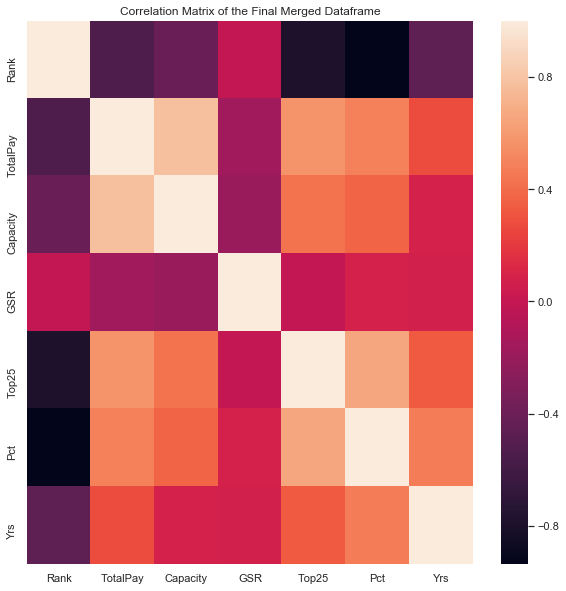

,Rank,TotalPay,Capacity,GSR,Top25,Pct,Yrs
Rank,1.000000,-0.539122,-0.412646,-0.011644,-0.790955,-0.937032,-0.465158
TotalPay,-0.539122,1.000000,0.778045,-0.158649,0.575439,0.491002,0.275281
Capacity,-0.412646,0.778045,1.000000,-0.195314,0.431145,0.370085,0.080985
GSR,-0.011644,-0.158649,-0.195314,1.000000,-0.006469,0.083975,0.072358
Top25,-0.790955,0.575439,0.431145,-0.006469,1.000000,0.652594,0.333635
Pct,-0.937032,0.491002,0.370085,0.083975,0.652594,1.000000,0.473504
Yrs,-0.465158,0.275281,0.080985,0.072358,0.333635,0.473504,1.000000


In [522]:
corr = finalMerged2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Correlation Matrix of the Final Merged Dataframe')
plt.show()
corr

In [380]:
finalMerged2.columns


Index(['Rank', 'School', 'Conference', 'Coach', 'TotalPay', 'Capacity', 'GSR',
       'Top25', 'Pct', 'Stadium', 'Yrs'],
      dtype='object')

# 3. Exploratory  Analysis

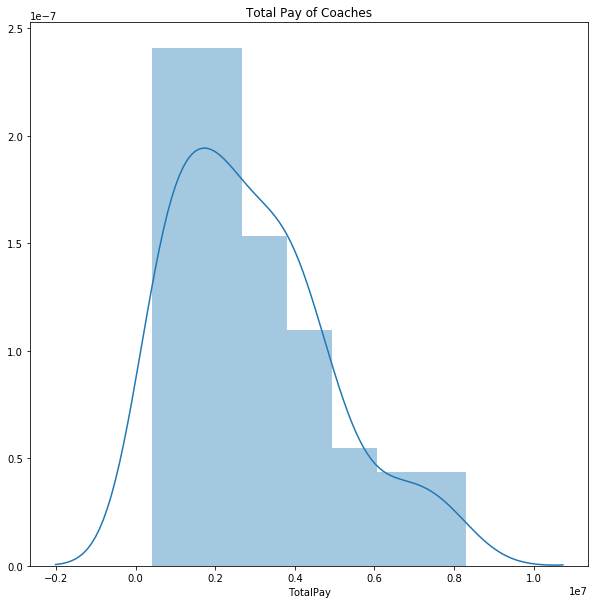

In [385]:
plt.figure(figsize=(10,10))
sns.distplot(finalMerged2['TotalPay'])
plt.title('Total Pay of Coaches')
plt.show()

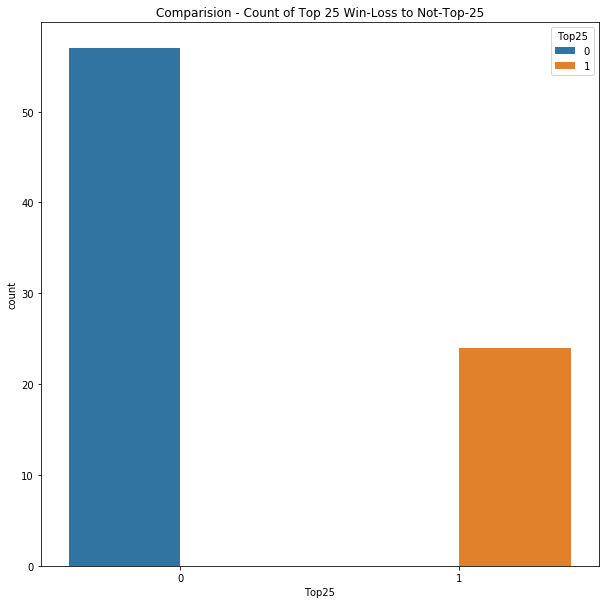

In [391]:
plt.figure(figsize=(10,10))
sns.countplot('Top25', data=finalMerged2, hue='Top25' )
plt.title('Comparision - Count of Top 25 Win-Loss to Not-Top-25')
plt.show()

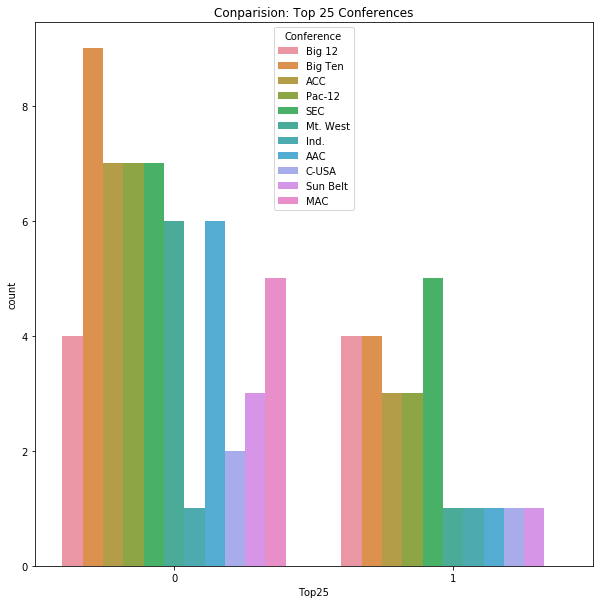

In [392]:
plt.figure(figsize=(10,10))
sns.countplot('Top25', data=finalMerged2, hue='Conference' )
plt.title('Comparision: Top 25 Conferences')
plt.show()


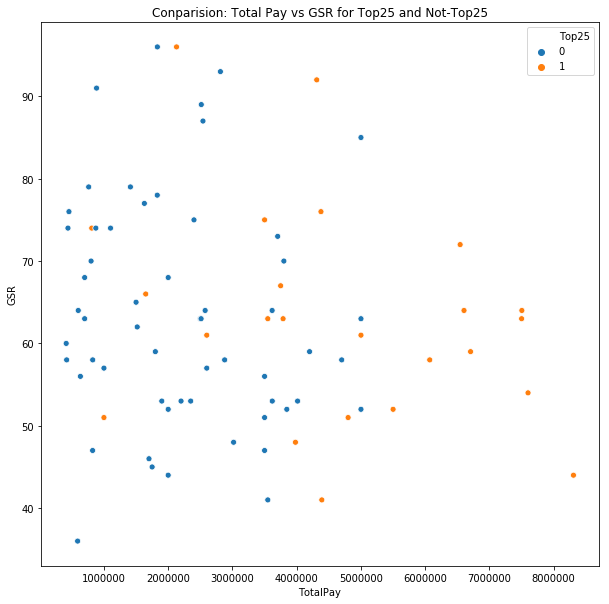

In [394]:
plt.figure(figsize=(10,10))
sns.scatterplot('TotalPay', 'GSR', data=finalMerged2, hue='Top25')
plt.title('Comparision: Total Pay vs GSR for Top25 and Not-Top25')
plt.show()

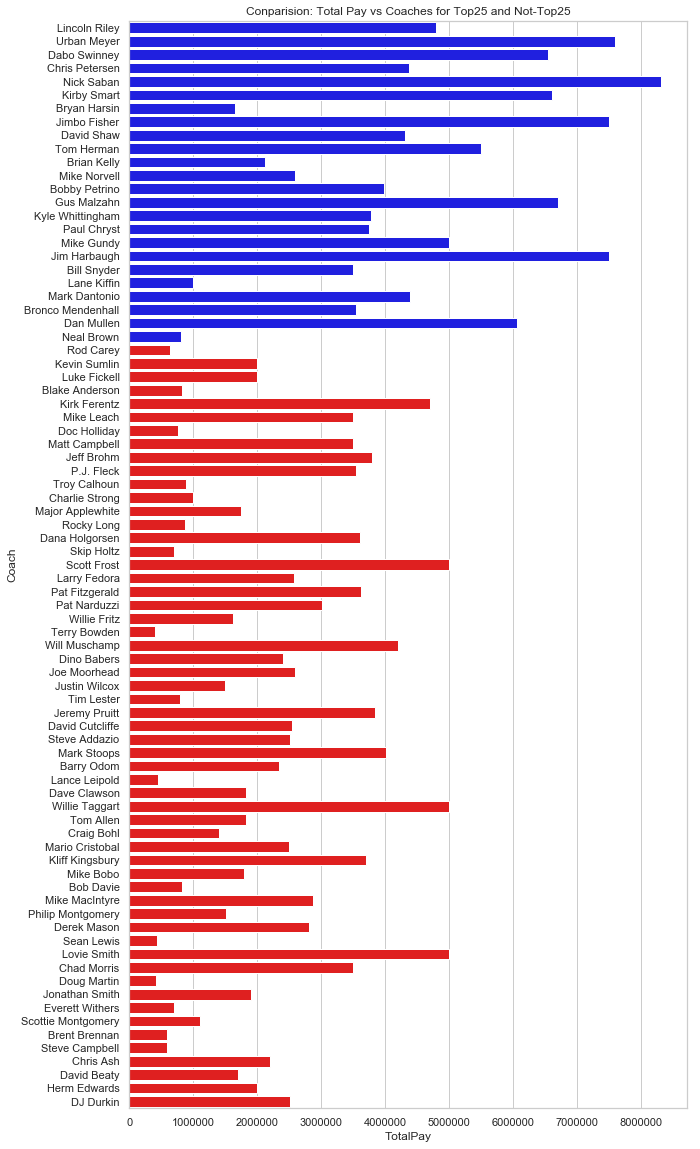

In [399]:
# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))


clrs = ['blue' if (x == 1 ) else 'red' for x in finalMerged2['Top25'].values ]

#plot comparision
sns.barplot(x="TotalPay", y='Coach', data=finalMerged2, label="Total", palette=clrs)
plt.title('Conparision: Total Pay vs Coaches for Top25 and Not-Top25')

plt.show()

Text(0.5, 1.0, 'Total Pay Density plot: Top-25 and Not-Top-25')

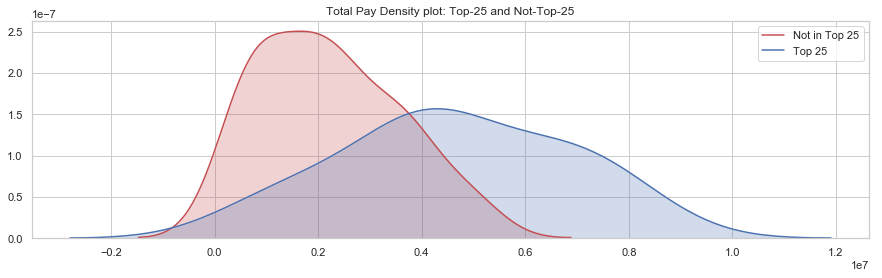

In [405]:
#TotalPay:  Kernel Density Estimate Plot for Top Vs Not-Top 25 Pay
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 0),'TotalPay'] , color='r',shade=True, label='Not in Top 25')
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 1),'TotalPay'] , color='b',shade=True, label='Top 25')
plt.title('Total Pay Density plot: Top-25 and Not-Top-25')


Text(0.5, 1.0, 'Stadium Capacity Density plot: Top-25 and Not-Top-25')

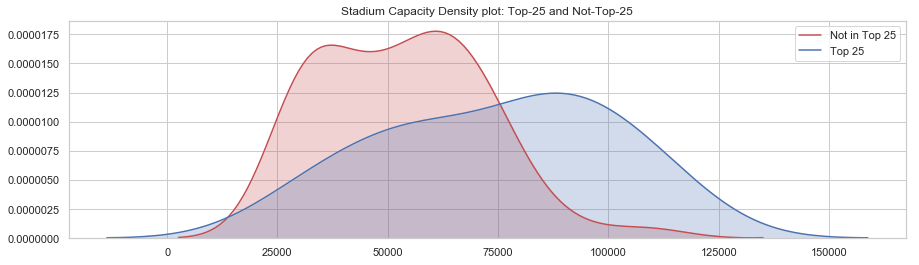

In [406]:
#Capacity:  Kernel Density Estimate Plot for Top Vs Not-Top 25 Pay


fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 0),'Capacity'] , color='r',shade=True, label='Not in Top 25')
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 1),'Capacity'] , color='b',shade=True, label='Top 25')
plt.title('Stadium Capacity Density plot: Top-25 and Not-Top-25')


Text(0.5, 1.0, 'Graduation Success Rate : Top-25 and Not-Top-25')

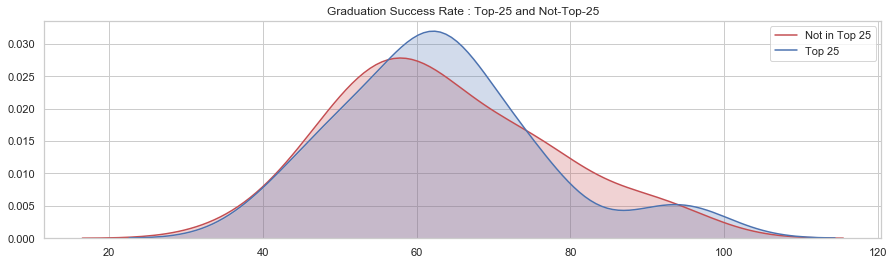

In [409]:
#TotalPay:  Kernel Density Estimate Plot for Top Vs Not-Top 25 Pay

fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 0),'GSR'] , color='r',shade=True, label='Not in Top 25')
ax=sns.kdeplot(finalMerged2.loc[(finalMerged2['Top25'] == 1),'GSR'] , color='b',shade=True, label='Top 25')
plt.title('Graduation Success Rate : Top-25 and Not-Top-25')

Text(0.5, 1.0, 'Boxplot Conference vs Total Pay: Top-25 and Not-Top-25')

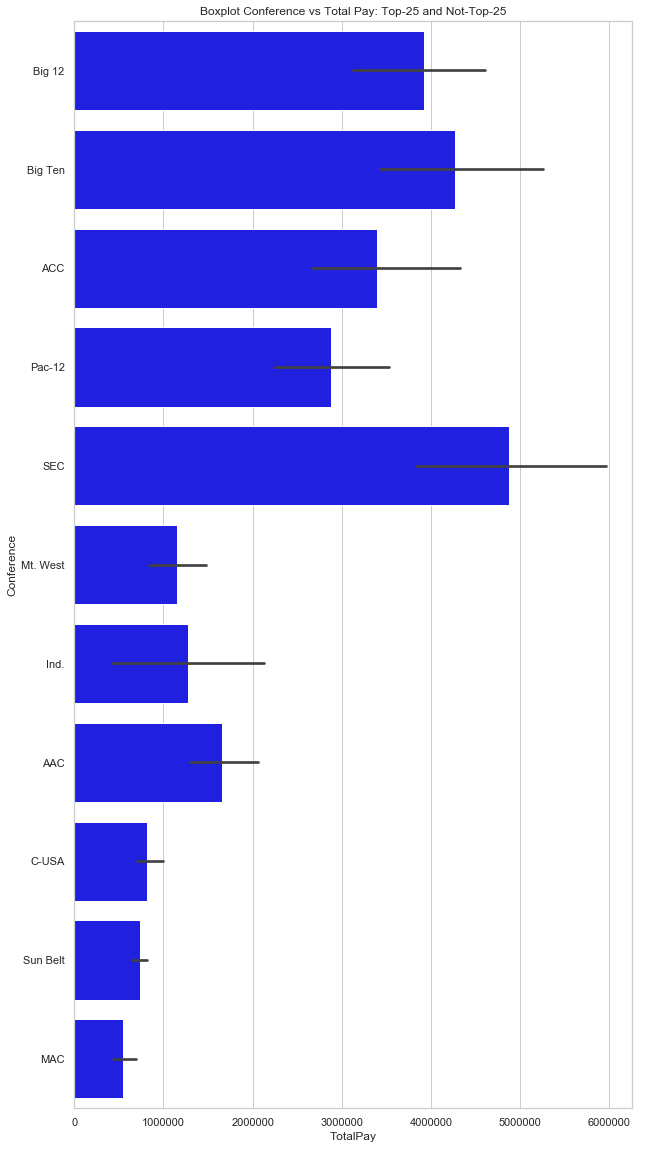

In [525]:
# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))


clrs = ['blue' if (x == 1 ) else 'red' for x in finalMerged2['Top25'].values ]

# Plot the Feature Importance
sns.barplot(x="TotalPay", y='Conference', data=finalMerged2, label="Total",  palette=clrs)
plt.title('Boxplot Conference vs Total Pay: Top-25 and Not-Top-25')



Text(0.5, 1.0, 'Boxplot Conference vs Graduation Success Rate: Top-25 and Not-Top-25')

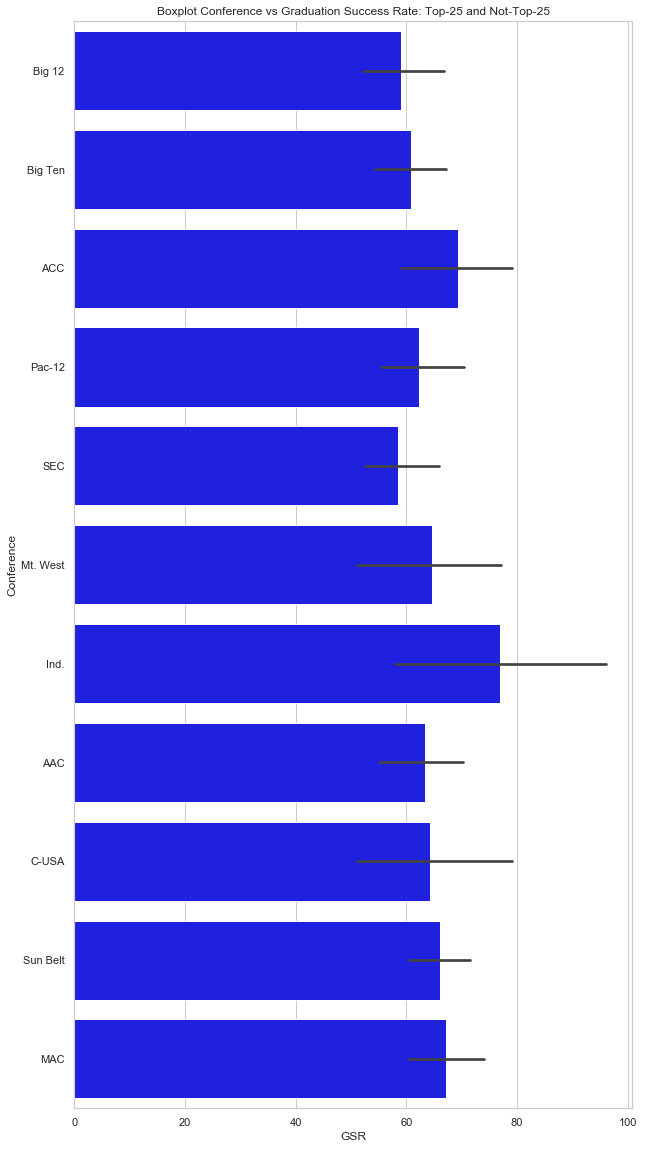

In [411]:
# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))


clrs = ['blue' if (x == 1 ) else 'red' for x in finalMerged2['Top25'].values ]

# Plot the Feature Importance
sns.barplot(x="GSR", y='Conference', data=finalMerged2, label="Total",  palette=clrs)
plt.title('Boxplot Conference vs Graduation Success Rate: Top-25 and Not-Top-25')



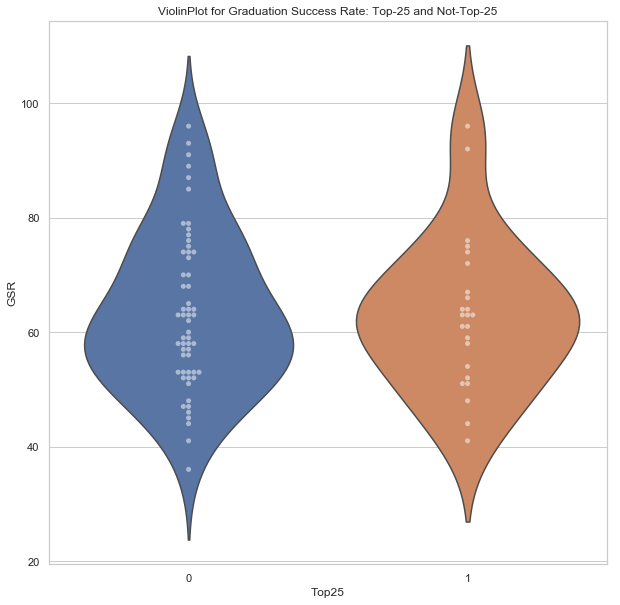

In [413]:
plt.figure(figsize =(10,10))
sns.violinplot(x="Top25", y="GSR", data=finalMerged2, inner=None)
sns.swarmplot(x="Top25", y="GSR", data=finalMerged2, color="w", alpha=.5)
plt.title('ViolinPlot for Graduation Success Rate: Top-25 and Not-Top-25')


plt.show()


In [526]:
print(finalMerged['GSR'].mean())

63.25925925925926


In [527]:
print(finalMerged['TotalPay'].mean())

2942227.5679012346


## Pickle: 

serialization of python objects
-convert object hiearchy into byte stream. 
-We have a few usages for this:  include converting the object into a character stream. It is good practice when needing to store the data into a file or databse. 

In my case, it allows me to save my model to a file and load it later in order to make predictions.

Resources: https://docs.python.org/2/library/pickle.html

In [416]:
import pickle
pickle_out = open('finalMerged2.pickle', 'wb')

pickle.dump(finalMerged2, pickle_out)

pickle_out.close()

# 4. Modeling

### OLS (Ordinary Least Squares)Model

In [539]:
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import patsy  # translate model specification into design matrices
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.stats import uniform  # for training-and-test split


class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
    
def load_file(file):
    '''loads pickle file to dataframe'''
    return pickle.load(open(file, 'rb'))


def get_train_test_stats(df, prop= 0.3):
    '''train:70%, test:30%'''
    df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))

    df_train = df[df['runiform'] >= prop]
    df_test = df[df['runiform'] < prop]
    
    return df_train, df_test


#define inputs : piackle file path for the coaches combined datasets
Coaches = 'finalMerged2.pickle'

    
#load data
print("Loading data")
coaches_df = load_file(Coaches)


# get train test

coach_train, coach_test = get_train_test_stats(coaches_df)


print(coach_train.columns)

Loading data
Index(['Rank', 'School', 'Conference', 'Coach', 'TotalPay', 'Capacity', 'GSR',
       'Top25', 'Pct', 'Stadium', 'Yrs', 'runiform'],
      dtype='object')


In [483]:
coach_train.head()

,Rank,School,Conference,Coach,TotalPay,Capacity,GSR,Top25,Pct,Stadium,Yrs,runiform
0,1,Oklahoma,Big 12,Lincoln Riley,4800000,88308,51,1,0.857,Gaylord Family Oklahoma Memorial Stadium,3.0,0.541908
1,2,Ohio State,Big Ten,Urban Meyer,7600000,110045,54,1,0.854,Ohio Stadium,17.0,0.843230
3,4,Washington,Pac-12,Chris Petersen,4377500,91704,76,1,0.795,FedExField,14.0,0.885922
5,6,Georgia,SEC,Kirby Smart,6603600,93246,64,1,0.786,Sanford Stadium,4.0,0.566775
6,7,Boise State,Mt. West,Bryan Harsin,1650010,36387,66,1,0.763,Albertsons Stadium,7.0,0.437363


### Regression Round 1: 
-TotalPay is the response in the model

In [462]:
linearRegressionCoach = smf.ols('TotalPay ~ Rank  + Conference + Top25 + GSR + Capacity + Pct + Yrs  + Capacity', data=coach_train).fit()

linearRegressionCoach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPay   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     16.90
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.35e-12
Time:                        22:52:13   Log-Likelihood:                -801.59
No. Observations:                  54   AIC:                             1637.
Df Residuals:                      37   BIC:                             1671.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.528e+06   2.29e+06     -0.667      0.509   -6.17e+06    3.12e+06
Conference[T.ACC]       1.129e+06   6.99e+05      1.615      0.115   -2.87e+05    2.54e+06
Conference[T.Big 12]    3.381e+05   8.03e+05      0.421      0.676   -1.29e+06    1.97e+06
Conference[T.Big Ten]   1.752e+06   6.12e+05      2.864      0.007    5.13e+05    2.99e+06
Conference[T.C-USA]    -7.609e+05   7.33e+05     -1.039      0.306   -2.25e+06    7.24e+05
Conference[T.Ind.]     -1.025e+06   8.99e+05     -1.140      0.262   -2.85e+06    7.97e+05
Conference[T.MAC]      -7.432e+05   6.57e+05     -1.132      0.265   -2.07e+06    5.88e+05
Conference[T.Mt. West] -5.942e+05   6.55e+05     -0.908      0.370   -1.92e+06    7.32e+05
Conference[T.Pac-12]    8.986e+05   6.43e+05      1.398      0.171   -4.04e+05     2.2e+06
Conference[T.SEC]       1.479e+06   6.41e+05      2.306      0.027    1.79e+05    2.78e+06
Conference[T.Sun Belt]  -4.65e+05    6.8e+05     -0.684      0.498   -1.84e+06    9.12e+05
Rank                    1.039e+04   2.36e+04      0.440      0.662   -3.74e+04    5.82e+04
Top25                   1.092e+06   4.64e+05      2.355      0.024    1.53e+05    2.03e+06
GSR                    -2000.5122   8567.366     -0.234      0.817   -1.94e+04    1.54e+04
Capacity                  28.3176      7.224      3.920      0.000      13.680      42.955
Pct                     2.415e+06   2.58e+06      0.937      0.355   -2.81e+06    7.64e+06
Yrs                     1.659e+04   3.04e+04      0.545      0.589   -4.51e+04    7.83e+04
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.400
Skew:                          -0.127   Prob(JB):                        0.819
Kurtosis:                       2.664   Cond. No.                     1.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Round 2:
-TotalPay is the response in the model
-conference,GSR, top 25 is predictor. 

In [553]:
#regression 2
linearRegressionCoach = smf.ols('TotalPay ~ Capacity + GSR + Top25 ', data=coach_train).fit()

linearRegressionCoach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPay   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     47.12
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.79e-14
Time:                        07:20:23   Log-Likelihood:                -806.74
No. Observations:                  53   AIC:                             1621.
Df Residuals:                      49   BIC:                             1629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.211e+05   9.18e+05     -0.785      0.436   -2.57e+06    1.12e+06
Capacity      63.0574      6.847      9.209      0.000      49.297      76.818
GSR        -2903.9891   1.22e+04     -0.237      0.813   -2.75e+04    2.17e+04
Top25       8.683e+05   3.41e+05      2.548      0.014    1.83e+05    1.55e+06
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.355
Skew:                          -0.200   Prob(JB):                        0.837
Kurtosis:                       2.967   Cond. No.                     4.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Round 3:
-TotalPay is the response in the model 
-conference and GSR  is predictor

In [554]:
linearRegressionCoach2 = smf.ols('TotalPay ~ Capacity + Top25', data=coach_train).fit()

linearRegressionCoach2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPay   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     72.01
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.90e-15
Time:                        07:20:41   Log-Likelihood:                -806.77
No. Observations:                  53   AIC:                             1620.
Df Residuals:                      50   BIC:                             1625.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -9.19e+05   3.83e+05     -2.400      0.020   -1.69e+06    -1.5e+05
Capacity      63.3283      6.688      9.469      0.000      49.896      76.761
Top25        8.65e+05   3.37e+05      2.565      0.013    1.88e+05    1.54e+06
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.400
Skew:                          -0.212   Prob(JB):                        0.819
Kurtosis:                       3.040   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear regression model 2 had the highest R-squared:  While this isn't a great model to use in our study, with the R-Squared of about .81 and the effectively zero probability F-statistic, the null hypothesis that the data gathered has no affect on an individual coach's pay can be dismissed.

In [450]:
prediction = linearRegressionCoach.predict(coach_test)

In [451]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction, coach_test['TotalPay'])

1221296128207.6553

In [452]:
print('{} : {} '.format(prediction, coach_test['TotalPay']))

2     4.601149e+06
4     5.630704e+06
9     4.129721e+06
13    5.676546e+06
16    4.157227e+06
18    4.200013e+06
21    4.573644e+06
28    3.858837e+06
31    2.389725e+06
35    1.534630e+06
38    2.429454e+06
41    2.839760e+06
44    1.595753e+06
47    2.873377e+06
49    2.447414e+06
54    3.921269e+06
59    3.919960e+06
61    2.441302e+06
62    2.456960e+06
64    8.496939e+05
65    2.426021e+06
66    1.549911e+06
67    4.043515e+06
69    3.874118e+06
74    1.586585e+06
77    3.843556e+06
79    2.407684e+06
dtype: float64 : 2     6543350
4     8307000
9     5500000
13    6705656
16    5000000
18    3500000
21    3550000
28    4700000
31    3500000
35    1000000
38    3617500
41    2575000
44    1629000
47    2401206
49    1500000
54    4013600
59    1830000
61    2500000
62    3703975
64     823740
65    2878500
66    1518177
67    2812523
69    5000000
74    1102500
77    2200000
79    2000000
Name: TotalPay, dtype: int64 


In [453]:
prediction = linearRegressionCoach2.predict(coach_test)
mean_squared_error(prediction, coach_test['TotalPay'])

2513581172756.502

## Recommended  Syracuse  Coaches Salary

In [573]:
# coaches_and_division1
syr = finalMerged2.loc[finalMerged2['School'] == 'Syracuse']
linearRegressionCoach2.predict(syr)

47    2.200728e+06
dtype: float64

 Recommend Syracuse Coaches Total Pay: $ 2,200,728

##  Schools dropped from Dataset.


In [473]:
# print(len(finalMerged2))
# print(len(coaches))
school_dropped = []
for index, row in coaches.iterrows():
  cad = finalMerged2.loc[finalMerged2['School']==row['School']]
  if not len(cad):
    print(row['School'], ' | ', row['Conference'],' | ', row['Coach'])

Alabama at Birmingham  |  C-USA  |  Bill Clark
Appalachian State  |  Sun Belt  |  Scott Satterfield
Army  |  Ind.  |  Jeff Monken
Ball State  |  MAC  |  Mike Neu
Bowling Green  |  MAC  |  Mike Jinks
Central Florida  |  AAC  |  Josh Heupel
Central Michigan  |  MAC  |  John Bonamego
Charlotte  |  C-USA  |  Brad Lambert
Coastal Carolina  |  Sun Belt  |  Joe Moglia
Connecticut  |  AAC  |  Randy Edsall
Eastern Michigan  |  MAC  |  Chris Creighton
Florida International  |  C-USA  |  Butch Davis
Fresno State  |  Mt. West  |  Jeff Tedford
Georgia Southern  |  Sun Belt  |  Chad Lunsford
Georgia State  |  Sun Belt  |  Shawn Elliott
Georgia Tech  |  ACC  |  Paul Johnson
Hawaii  |  Mt. West  |  Nick Rolovich
Liberty  |  Ind.  |  Turner Gill
Louisiana-Lafayette  |  Sun Belt  |  Billy Napier
Louisiana-Monroe  |  Sun Belt  |  Matt Viator
LSU  |  SEC  |  Ed Orgeron
Massachusetts  |  Ind.  |  Mark Whipple
Miami (Fla.)  |  ACC  |  Mark Richt
Miami (Ohio)  |  MAC  |  Chuck Martin
Middle Tennessee  |  C-U

In [490]:
Syracuse = coach_test[coach_test['School'] == 'Syracuse']
Syracuse

,Rank,School,Conference,Coach,TotalPay,Capacity,GSR,Top25,Pct,Stadium,Yrs,runiform
47,48,Syracuse,ACC,Dino Babers,2401206,49262,75,0,0.539,Carrier Dome,6.0,0.024298


# Linear Regression Model

In [540]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# local variables
lin_rg = linear_model.LinearRegression()

# split train + test
train, test = train_test_split(finalMerged2, test_size=0.33)

#
# train model
#
y_train = train[['TotalPay']]
X_train = train[['Capacity', 'GSR', 'Pct']]
lin_rg.fit(X_train, y_train)

#
# predict
#
y_test = test[['TotalPay']]
X_test = test[['Capacity', 'GSR', 'Pct']]
y_pred = lin_rg.predict(X_test)

In [541]:
# predict syr coach salary
target = finalMerged2[finalMerged2['School'] == 'Syracuse']
lin_rg.predict(target[['Capacity', 'GSR', 'Pct']])

array([[2568511.25018134]])

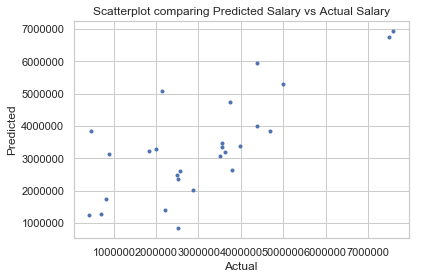

In [542]:
# prediction salary vs actual salary from data
plt.plot(y_test, y_pred, '.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot comparing Predicted Salary vs Actual Salary')


plt.show()

In [543]:
from sklearn.metrics import r2_score

print('model coefficients: {}\nmodel intercept: {}\nmean squared error: {}\nrsquared: {}'.format(
    lin_rg.coef_,
    lin_rg.intercept_,
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)
))

model coefficients: [[5.96380679e+01 1.25835813e+04 3.22783132e+06]]
model intercept: [-3052948.93152023]
mean squared error: 1569942200400.3542
rsquared: 0.5166091215207991


###  Predict Salary if Syr was in Big Ten

In [548]:
train_big10, test_big_10 = train_test_split(finalMerged2[finalMerged2['Conference'] == 'Big Ten'], test_size=0.33)


# big 10: train model
y_train_big10 = train_big10[['TotalPay']]
X_train_big10 = train_big10[['Capacity', 'GSR']]

In [549]:
# big 10: train ols

est_big10 = sm.OLS(y_train_big10, X_train_big10)
ols_reg_big10 = est_big10.fit()
print(ols_reg_big10.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     135.4
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.02e-05
Time:                        07:19:40   Log-Likelihood:                -118.89
No. Observations:                   8   AIC:                             241.8
Df Residuals:                       6   BIC:                             241.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Capacity      83.1441     10.208      8.145      0.0

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [571]:
big10 = finalMerged2.loc[finalMerged2['Conference'] == 'Big Ten']
linearRegressionCoach2.predict(big10)

1     6.915001e+06
15    5.032631e+06
17    7.235696e+06
20    4.695977e+06
28    3.551077e+06
32    2.705708e+06
33    3.302197e+06
40    4.880971e+06
42    2.065712e+06
59    3.070732e+06
69    2.923177e+06
77    2.402872e+06
80    2.361582e+06
dtype: float64

3.71e+03 - expected salary about the same, if not slightly higher. 